In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

SPR_COUNT = 10

In [40]:
data = pd.read_csv('twitch_data/PTBR/musae_PTBR_edges.csv')

In [41]:
graph = nx.convert_matrix.from_pandas_edgelist(data, 'from', 'to')
len(graph.nodes)

1912

In [42]:
#b_dict = nx.betweenness_centrality(graph)
#sprs_bet = sorted(b_dict, key=b_dict.get)[-SPR_COUNT:]
#sprs_bet

In [43]:
sprs_bet = [428, 287, 1259, 1660, 67, 467, 290, 1297, 1476, 127]
sprs_bet

[428, 287, 1259, 1660, 67, 467, 290, 1297, 1476, 127]

In [44]:
#c_dict = nx.closeness_centrality(graph)
#sprs_closeness = sorted(c_dict, key=c_dict.get)[-SPR_COUNT:]
#sprs_closeness

In [45]:
sprs_closeness = [287, 1259, 1593, 1660, 67, 1476, 290, 467, 1297, 127]
sprs_closeness

[287, 1259, 1593, 1660, 67, 1476, 290, 467, 1297, 127]

In [46]:
sprs_voterank = nx.voterank(graph, number_of_nodes=SPR_COUNT)
sprs_voterank

[127, 1476, 290, 1297, 467, 1660, 67, 1320, 1758, 1259]

In [47]:
vr_model = ep.SIRModel(graph)
vr_cfg = mc.Configuration()

In [48]:
vr_cfg.add_model_parameter('beta', 0.75)
vr_cfg.add_model_parameter('gamma', 0.5)
vr_cfg.add_model_initial_configuration('Infected', sprs_voterank)
vr_model.set_initial_status(vr_cfg)
vr_iters = vr_model.iteration_bunch(100)

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 108.50it/s]


In [49]:
c_model = ep.SIRModel(graph)
c_cfg = mc.Configuration()

In [50]:
c_cfg.add_model_parameter('beta', 0.3)
c_cfg.add_model_parameter('gamma', 0.5)
c_cfg.add_model_initial_configuration('Infected', sprs_closeness)
c_model.set_initial_status(c_cfg)
c_iters = c_model.iteration_bunch(100)

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 108.50it/s]


In [51]:
b_model = ep.SIRModel(graph)
b_cfg = mc.Configuration()

In [52]:
b_cfg.add_model_parameter('beta', 0.3)
b_cfg.add_model_parameter('gamma', 0.5)
b_cfg.add_model_initial_configuration('Infected', sprs_bet)
b_model.set_initial_status(b_cfg)
b_iters = b_model.iteration_bunch(100)

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 106.69it/s]


In [53]:
def get_score(iters, index):
    i = iters[index]
    s_count = i['node_count'][0]
    i_count = i['node_count'][1]
    r_count = i['node_count'][2]
    s = s_count + i_count + r_count
    return (i_count + r_count) / s

In [54]:
scores = pd.DataFrame(data={'t': np.arange(100)})

In [55]:
scores['voterank'] = [get_score(vr_iters, t) for t in scores['t']]
scores['closeness'] = [get_score(c_iters, t) for t in scores['t']]
scores['betweenness'] = [get_score(b_iters, t) for t in scores['t']]

In [56]:
scores.head(10)

,t,voterank,closeness,betweenness
0,0,0.005230,0.005230,0.005230
1,1,0.641736,0.455544,0.460251
2,2,0.947176,0.842573,0.829498
3,3,0.986402,0.918410,0.918410
4,4,0.988494,0.934100,0.934100
5,5,0.989017,0.937762,0.936192
6,6,0.989017,0.941946,0.937238
7,7,0.989017,0.942992,0.937762
8,8,0.989017,0.943515,0.937762
9,9,0.989017,0.943515,0.938808


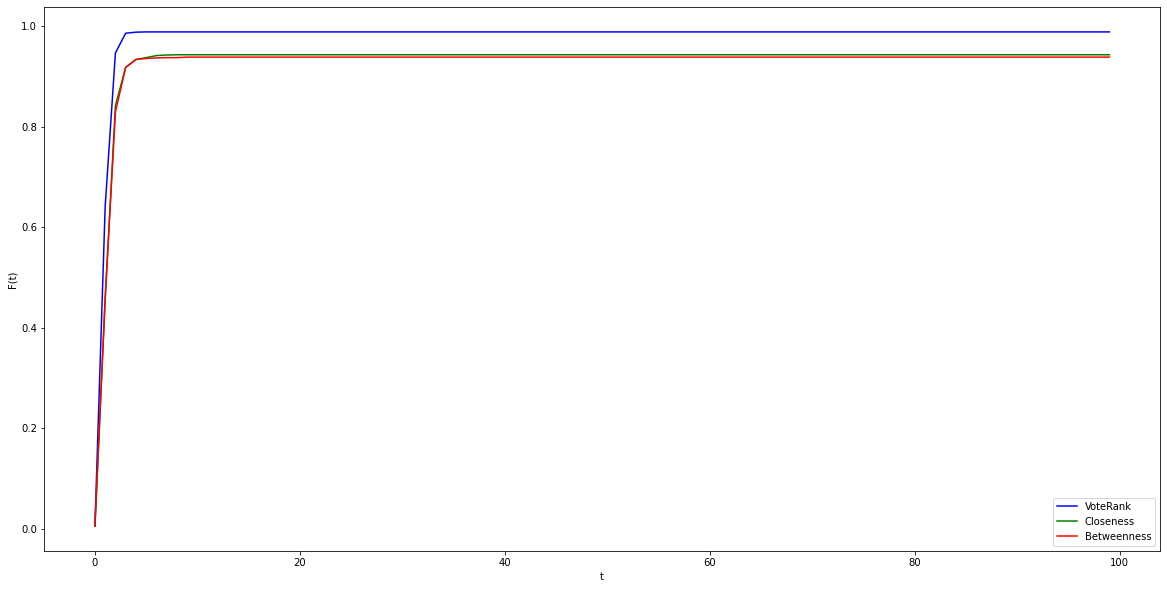

In [72]:
plt.figure(figsize=(20, 10))
plt.xlabel('t')
plt.ylabel('F(t)')
plt.plot(scores['t'], scores['voterank'], '-b', label='VoteRank')
plt.plot(scores['t'], scores['closeness'], '-g', label='Closeness')
plt.plot(scores['t'], scores['betweenness'], '-r', label='Betweenness')
plt.legend()
plt.show()